# crawling urls of articles

In [ ]:
import requests
from bs4 import BeautifulSoup

# 기사 URL을 저장할 리스트
article_urls = []

# 페이지 수
num_pages = 30

# 각 페이지를 순회하면서 기사 URL을 추출
for page in range(1, num_pages+1):
    url = f"https://m.tenbizt.com/news/issue/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('li')

    # 기사 URL 추출
    for article in articles:
        link = article.find('a')
        if link:
            article_url = link.get('href')
            article_urls.append(article_url)

# 추출된 기사 URL 출력 (660개)
urls = [item for item in article_urls if 'https://m.tenbizt.com/issue/article' in item]

# extract anchor text (urls)

In [ ]:
from html.parser import HTMLParser
from urllib.request import urlopen
from urllib.parse import urljoin

class MyHTMLParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.links = []

    def handle_starttag(self, tag, attrs):
        if tag == 'a':
            for (name, value) in attrs:
                if name == 'href':
                    self.links.append(value)
                    break

df = pd.DataFrame(columns=['idx', 'URL', 'links'])

for i, url in enumerate(urls):
    parser = MyHTMLParser()
    response = urlopen(url)
    html_content = response.read().decode('utf-8')
    parser.feed(html_content)
    absolutes = []
    # 상대 URL을 절대 URL로 변환하고, all_absolutes 리스트에 추가
    for link in parser.links:
        absolutes.append(urljoin(url, link))
    df.loc[len(df)] = [None, url, absolutes]

# 결과 출력
df.head()

In [ ]:
df.to_csv('df.csv')

In [1]:
import pandas as pd
df = pd.read_csv('df_links.csv')

In [2]:
df.head()

,idx,URL,links,link_idx
0,1,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,2,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,3,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,4,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,5,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."


# remove a col that we don't need

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df

,URL,links,link_idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
3,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
4,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43..."
...,...,...,...
655,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
656,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
657,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."
658,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44..."


In [5]:
df.to_csv('df_links.csv', index=False) # 이러면 빈칼럼에 인덱스 저장 안되지

# (put values in the empty col)

In [6]:
df['idx'] = range(1, 661)

In [7]:
df

,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",1
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",2
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",3
3,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",4
4,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",5
...,...,...,...,...
655,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44...",656
656,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44...",657
657,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44...",658
658,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 43, 44...",659


In [8]:
df.head(1)

,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 43...",1


# replace real url links to idices

In [9]:
# 새 칼럼 준비
df['link_idx'] = None
df

,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,None,1
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,None,2
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,None,3
3,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,None,4
4,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,None,5
...,...,...,...,...
655,https://m.tenbizt.com/issue/article/99829/,['https://m.tenbizt.com/issue/article/99829/#g...,None,656
656,https://m.tenbizt.com/issue/article/100233/,['https://m.tenbizt.com/issue/article/100233/#...,None,657
657,https://m.tenbizt.com/issue/article/99682/,['https://m.tenbizt.com/issue/article/99682/#g...,None,658
658,https://m.tenbizt.com/issue/article/112322/?ut...,['https://m.tenbizt.com/issue/article/112322/?...,None,659


### test (부분문자열로 검사)

In [10]:
test = pd.DataFrame({
    'idx' : range(3),
    'URL' : ['u','t','e'],
    'links' : [['j/t/d','e'],['d'],['u']]
})
test

,idx,URL,links
0,0,u,"[j/t/d, e]"
1,1,t,[d]
2,2,e,[u]


In [11]:
for idx, links in zip(test['idx'], test['links']):
    for link in links:
        # URL 리스트를 순회하며 부분 문자열이 포함되어 있는지 검사
        if any(url in link for url in test['URL']):
            print(idx, link)

0 j/t/d
0 e
2 u


In [12]:
for idx, links in zip(df[:1]['idx'], df[:1]['links']):
    for link in links:
        print(link,'\n')

[ 

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

g 

n 

b 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

m 

a 

i 

n 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

i 

s 

s 

u 

e 

/ 

a 

r 

t 

i 

c 

l 

e 

/ 

1 

1 

4 

0 

9 

2 

/ 

# 

b 

n 

b 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

n 

e 

w 

s 

/ 

i 

s 

s 

u 

e 

/ 

' 

, 

  

' 

h 

t 

t 

p 

s 

: 

/ 

/ 

m 

. 

t 

e 

n 

b 

i 

z 

t 

. 

c 

o 

m 

/ 

n 

e 

w 

s 

/ 

c 

u 

l 

t 

u 



### link 문자열 하나하나 비교하는게 아니라 뭉텅이로 비교해야함

In [13]:
print(len(df.loc[0, 'links']))

5460


In [14]:
len(df['links'][0])

5460

In [15]:
for idx, links in zip(df[:5]['idx'], df[:5]['links']):
    sum=0
    print(idx)
    for url_idx, url in zip(df['idx'], df['URL']):
        if url in links:
            #print(url,'\n')
            sum += 1
    print(sum)

1
78
2
78
3
78
4
79
5
75


In [16]:
df = df[:22]

In [17]:
df['link_idx'] = [[] for _ in range(len(df))]
df

/tmp/ipykernel_9983/911868226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['link_idx'] = [[] for _ in range(len(df))]


,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,[],1
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,[],2
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,[],3
3,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,[],4
4,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,[],5
5,https://m.tenbizt.com/issue/article/113924/,['https://m.tenbizt.com/issue/article/113924/#...,[],6
6,https://m.tenbizt.com/issue/article/113699/,['https://m.tenbizt.com/issue/article/113699/#...,[],7
7,https://m.tenbizt.com/issue/article/113803/,['https://m.tenbizt.com/issue/article/113803/#...,[],8
8,https://m.tenbizt.com/issue/article/113433/,['https://m.tenbizt.com/issue/article/113433/#...,[],9
9,https://m.tenbizt.com/issue/article/113411/,['https://m.tenbizt.com/issue/article/113411/#...,[],10


In [18]:
df['link_idx'] = [[] for _ in range(len(df))]

for row_idx, (idx, links) in enumerate(zip(df['idx'], df['links'])):
    cnt = 0
    for url_idx, url in zip(df['idx'], df['URL']):
        if (url in links): 
            #df.loc[df['idx'] == idx, 'link_idx'] += url_idx # 21643..이런식으로 저장됨
            df.at[row_idx, 'link_idx'].append(url_idx) # 'link_idx' 칼럼이 리스트일 때 가능
            cnt += 1
    #print(idx, cnt)

/tmp/ipykernel_9983/1187362876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['link_idx'] = [[] for _ in range(len(df))]


In [19]:
df.head(3)

,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",1
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",2
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",3


In [20]:
len(df['link_idx'][0])

13

# make in-link and out-link lists

In [21]:
import pandas as pd
import numpy as np

# 노드 목록 생성
nodes = df['idx'].tolist()

# 인바운드 링크와 아웃바운드 링크를 저장할 딕셔너리 초기화
inlinks = {node: set() for node in nodes} # 고유 'idx'
outlinks = {node: set() for node in nodes}

# 인바운드 링크와 아웃바운드 링크 채우기
for idx, links in zip(df['idx'], df['link_idx']):
    outlinks[idx].update(links) 
    for link in links:
        inlinks[link].add(idx)

In [22]:
# 78개여야함
len(outlinks[1])

13

In [23]:
# 링크 행렬 생성
link_matrix = pd.DataFrame(0, index=nodes, columns=nodes) # 모든 값 0으로 초기화

for url in nodes:
    for link in outlinks[url]:
        link_matrix.loc[url, link] = 1

In [24]:
link_matrix

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
7,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
8,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
10,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1


In [25]:
new = df

In [26]:
new

,URL,links,link_idx,idx
0,https://m.tenbizt.com/issue/article/114092/,['https://m.tenbizt.com/issue/article/114092/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",1
1,https://m.tenbizt.com/issue/article/113685/,['https://m.tenbizt.com/issue/article/113685/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",2
2,https://m.tenbizt.com/issue/article/113999/,['https://m.tenbizt.com/issue/article/113999/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",3
3,https://m.tenbizt.com/issue/article/114021/,['https://m.tenbizt.com/issue/article/114021/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",4
4,https://m.tenbizt.com/issue/article/114006/,['https://m.tenbizt.com/issue/article/114006/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",5
5,https://m.tenbizt.com/issue/article/113924/,['https://m.tenbizt.com/issue/article/113924/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",6
6,https://m.tenbizt.com/issue/article/113699/,['https://m.tenbizt.com/issue/article/113699/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",7
7,https://m.tenbizt.com/issue/article/113803/,['https://m.tenbizt.com/issue/article/113803/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 21, 22]",8
8,https://m.tenbizt.com/issue/article/113433/,['https://m.tenbizt.com/issue/article/113433/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22]",9
9,https://m.tenbizt.com/issue/article/113411/,['https://m.tenbizt.com/issue/article/113411/#...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 21, 22]",10


`networkx`의 `pagerank` 함수는 웹 페이지의 중요도를 순위 매기는데 사용되는 PageRank 알고리즘을 구현합니다. 이 알고리즘은 웹 페이지 간의 링크 구조를 바탕으로 각 페이지의 중요도를 추정합니다. 여기서 언급한 "transition matrix with teleporting"은 PageRank 알고리즘의 핵심 개념 중 하나입니다.

### PageRank와 Transition Matrix

PageRank 알고리즘에서는 웹을 하나의 큰 그래프로 모델링합니다. 각 웹 페이지는 그래프의 노드가 되고, 한 페이지에서 다른 페이지로의 링크는 노드 간의 방향성 있는 엣지가 됩니다. Transition matrix는 이 그래프의 이동 확률을 나타내는데, matrix의 각 항목은 특정 페이지에서 다른 페이지로 이동할 확률을 나타냅니다.

### Teleporting

웹 페이지들 사이에 링크가 없거나, 링크가 있더라도 어떤 페이지들은 다른 페이지로 이동할 수 없는 "dead ends" 상태가 될 수 있습니다. 이를 해결하기 위해 PageRank 알고리즘은 "teleporting"을 도입합니다. 사용자가 현재 페이지에서 다른 페이지로 링크를 따라 이동하는 대신, 전체 웹 중 임의의 페이지로 "teleport"할 확률을 도입하는 것입니다. 이는 알고리즘의 수렴을 도와주고, 모든 페이지가 어느 정도의 중요도를 가지게 합니다.

### networkx의 pagerank

`networkx`의 `pagerank` 함수는 이러한 PageRank 알고리즘을 구현하고 있으며, `alpha` 매개변수를 통해 teleporting의 확률을 조정할 수 있습니다. 기본값은 `alpha=0.85`이며, 이는 사용자가 현재 페이지에서 링크를 따라 다른 페이지로 이동할 확률이 85%이고, 나머지 15%는 임의의 페이지로 teleport 할 확률을 의미합니다.

```python
result = nx.pagerank(Graph, 

pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
tps://agent.wrtn.ai/5xb91l

# py.
주어진 전이 가중치(Transition Weights)를 기반으로 하는 PageRank 알고리즘의 구현입니다. PageRank는 웹 페이지의 중요도를 결정하는 데 사용되는 알고리즘으로, 웹 페이지 간의 링크 구조를 분석하여 각 페이지의 '등급'을 계산합니다. 이 코드는 PageRank를 임의의 네트워크(예: 웹 페이지, 인용 네트워크 등)에 적용할 수 있게 일반화합니다.

### 주요 함수 및 단계

1. **__extract_nodes(matrix):** 전이 행렬에서 노드(예: 웹 페이지)의 집합을 추출합니다. 이 함수는 행렬과 그 전치행렬(T)에서 노드를 찾아 집합으로 반환합니다.

2. **__make_square(matrix, keys, default=0.0):** 주어진 키 집합에 대해 행렬을 정사각형으로 만듭니다. 누락된 행이나 열이 있으면 기본값으로 채워 넣습니다.

3. **__ensure_rows_positive(matrix):** 모든 행의 합이 0이 아니게 합니다. 만약 행의 합이 0이면, 해당 행을 1로 채웁니다.

4. **__normalize_rows(matrix):** 행렬의 각 행을 정규화하여, 각 행의 합이 1이 되도록 합니다. 이는 전이 확률 행렬을 만드는 과정입니다.

5. **__euclidean_norm(series):** 주어진 시리즈의 유클리드 노름을 계산합니다. 이는 반복 과정에서 변화량을 측정하는 데 사용됩니다.

### PageRank 특정 기능

1. **__start_state(nodes):** 초기 상태 벡터를 만듭니다. 모든 노드에 동일한 확률을 할당합니다.

2. **__integrate_random_surfer(nodes, transition_probabilities, rsp):** 랜덤 서퍼 모델을 통합합니다. rsp(랜덤 서퍼 확률)를 사용하여 직접 링크를 따르는 확률과 임의의 페이지로 점프하는 확률을 결합합니다.

3. **power_iteration(transition_weights, rsp=0.15, epsilon=0.00001, max_iterations=1000):** 전력 반복 방법을 사용하여 PageRank 점수를 계산합니다. 이 과정은 주어진 전이 확률 행렬에 대해 반복적으로 상태 벡터를 업데이트하며, 상태 벡터의 변화가 충분히 작아질 때까지(epsilon 이하) 또는 최대 반복 횟수에 도달할 때까지 계속됩니다.

### 전체적인 프로세스

1. 전이 가중치를 기반으로 전이 확률 행렬을 만듭니다.
2. 초기 상태 벡터를 설정합니다.
3. 랜덤 서퍼 모델을 통합하여 전이 확률을 조정합니다.
4. 전력 반복을 통해 PageRank 점수를 계산합니다.

이 구현은 네트워크의 구조를 통해 각 노드의 중요도를 평가하는 강력한 방법을 제공합니다. PageRank 알고리즘은 원래 Google 검색 엔진의 핵심 부분으로 사용되었으며, 다양한 네트워크 분석 문제에 널리 적용됩니다. 

이런 자료를 참고했어요.
[1] velog - 4. Link Analysis: PageRank (https://velog.io/@tobigsgnn1415/4.-Link-Analysis-PageRank)
[2] perfect-occasion.co.kr - [Link Analysis] - Software (https://perfect-occasion.co.kr/entry/Link-Analysis)
[3] velog - [CS224W] Lecture 4 - PageRank (https://velog.io/@stapers/Lecture-4-PageRank)
[4] Wikipedia - 페이지랭크 - 위키백과, 우리 모두의 백과사전 (https://ko.wikipedia.org/wiki/%ED%8E%98%EC%9D%B4%EC%A7%80%EB%9E%AD%ED%81%AC) 

뤼튼 사용하러 가기 > https://agent.wrtn.ai/5xb91l

In [27]:
import networkx as nx
Graph = nx.DiGraph()
for url, links in zip(new['idx'], new['link_idx']):
    for link in links:
        Graph.add_edge(url, link)
result = nx.pagerank(Graph, alpha=0.85, max_iter=1000, tol= 0.00001) # 내가 만든 파일이랑 조건을 맞추기 위함

In [28]:
result

{1: 0.0723153760848231,
 2: 0.0723153760848231,
 3: 0.0723153760848231,
 4: 0.0723153760848231,
 5: 0.0723153760848231,
 6: 0.0723153760848231,
 7: 0.0723153760848231,
 8: 0.0723153760848231,
 9: 0.0723153760848231,
 10: 0.0723153760848231,
 11: 0.05715827795992096,
 21: 0.0723153760848231,
 22: 0.0723153760848231,
 20: 0.016690237850452542,
 12: 0.007295871396468804,
 13: 0.007295871396468804,
 14: 0.007295871396468804,
 15: 0.007295871396468804,
 16: 0.007295871396468804,
 17: 0.007295871396468804,
 18: 0.007295871396468804,
 19: 0.007295871396468804}

In [29]:
sum(result.values())

TypeError: 'int' object is not callable

In [ ]:
len(result)

In [ ]:
import matplotlib.pyplot as plt

node_size = [result[node] * 10000 for node in Graph.nodes()]

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(Graph, with_labels=True, node_size=node_size, 
        arrowstyle='->', arrowsize=20, 
        node_color='skyblue', font_size=15, 
        font_weight='bold', alpha=0.9)
plt.title('PageRank', size=20)
plt.show()

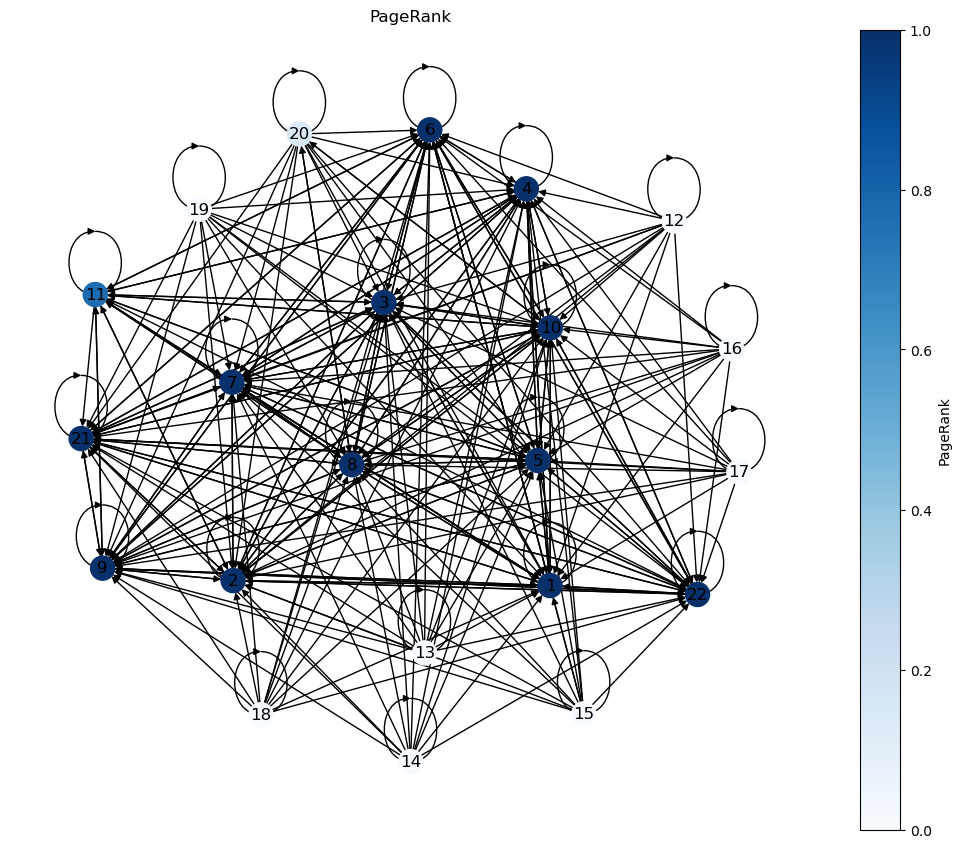

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# PageRank 점수가 0.005보다 큰 노드를 포함하는 부분 그래프 생성
sub_nodes = [node for node, score in result.items()]
H = Graph.subgraph(sub_nodes)

# PageRank 점수에 따라 색상 지정
scores = [result[node] for node in H]
colors = [score / max(scores) for score in scores]  # 점수를 색상 값으로 변환

# 그래프 플로팅
plt.figure(figsize=(10, 8))
nx.draw(H, with_labels=True, node_color=colors, cmap=plt.cm.Blues, node_size=300)
plt.title("PageRank")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='PageRank')
plt.show()

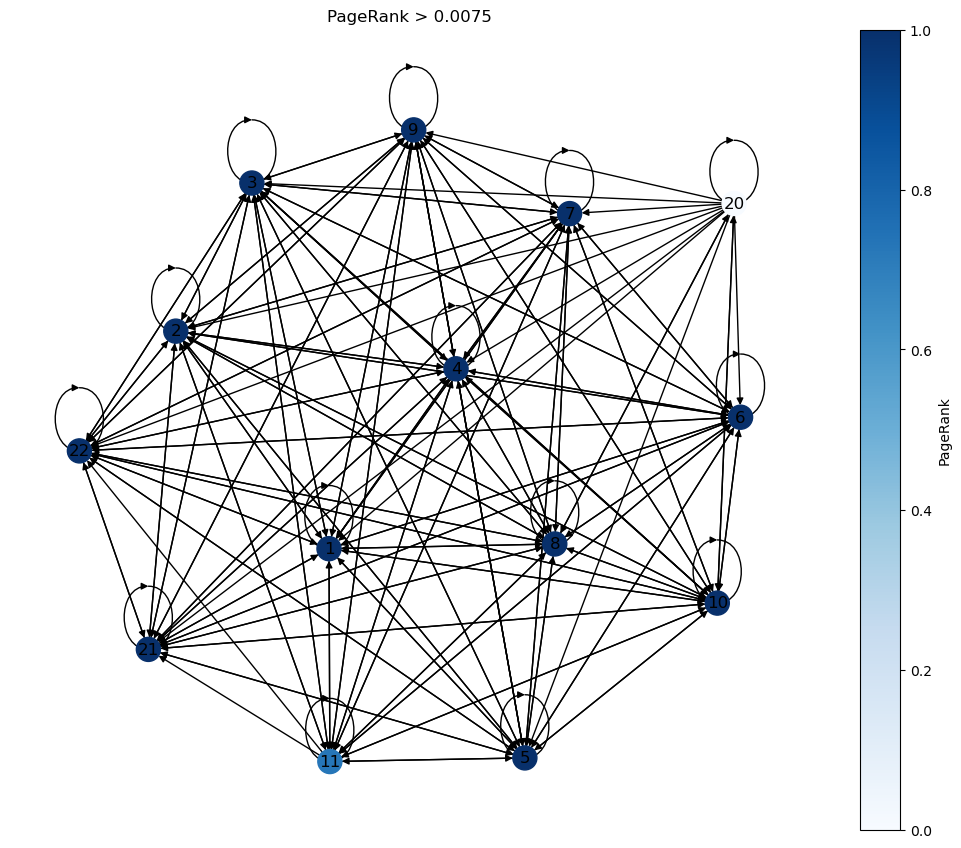

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# PageRank 점수가 0.005보다 큰 노드를 포함하는 부분 그래프 생성
sub_nodes = [node for node, score in result.items() if score > 0.0075]
H = Graph.subgraph(sub_nodes)

# PageRank 점수에 따라 색상 지정
scores = [result[node] for node in H]
colors = [score / max(scores) for score in scores]  # 점수를 색상 값으로 변환

# 그래프 플로팅
plt.figure(figsize=(10, 8))
nx.draw(H, with_labels=True, node_color=colors, cmap=plt.cm.Blues, node_size=300)
plt.title("PageRank > 0.0075")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='PageRank')
plt.show()

# 너무 많은 것 같아서 뉴스 기사 10개로만 다시해봄 (그래프 더 잘 보이도록)